In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Problem Statement 1: A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

 Dataset Information: The walmart.csv contains 6435 rows and 8 columns.

 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

 a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

 b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks


In [4]:
## checking the basic info pf the data


df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
### there is no nulls and duplicated
## date is set to object which we need to change it back to dateformat
## while the data might contain outliers but it may to be good to remove the outliers

In [8]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)## normal way is not working because of the misx in arrangement

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
## now lets solve the problems
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [12]:
##  If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

unemployment_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['Unemployment'])).reset_index(name='effect')
.sort_values('effect'))


/tmp/ipython-input-3410346056.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unemployment_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['Unemployment'])).reset_index(name='effect')


In [13]:
print(f'top {unemployment_effect.head()}')
print(f'bottom{unemployment_effect.tail()}')

top     Store    effect
37     38 -0.785290
43     44 -0.780076
38     39 -0.384681
41     42 -0.356355
40     41 -0.350630
bottom    Store    effect
29     30  0.201862
13     14  0.210786
20     21  0.218367
34     35  0.483865
35     36  0.833734


positive correlation- if x increase then y will increase
negative correlation- if x decreases then y will increase

Here some of the stores are showing both negative and positive correlations. 38,44,41 .. are some of the stores that shows negative correlation . So yes unemployment affects the Weekly_Sales of stores

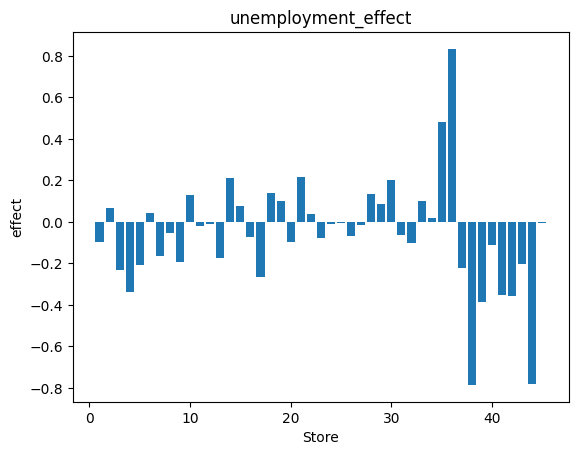

In [14]:
plt.bar(unemployment_effect['Store'],unemployment_effect['effect'])
plt.xlabel('Store')
plt.ylabel('effect')
plt.title('unemployment_effect')
plt.show()

b. If the weekly sales show a seasonal trend, when and what could be the reason?

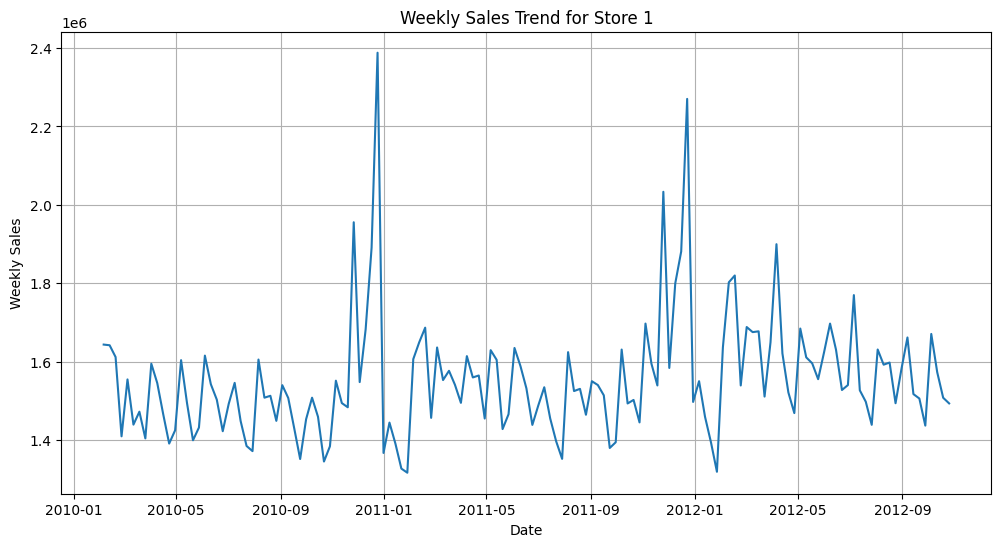

In [15]:
store_1_df = df[df['Store'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(store_1_df['Date'], store_1_df['Weekly_Sales'])
plt.title('Weekly Sales Trend for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Yes ,there is a  seasonal trend . We can see it on the graph , there is a spike on end of both years. it may be because of the vaccaction, newyear purchases etc.

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [16]:
cpi_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['CPI'])).reset_index(name='effect')
.sort_values('effect'))

/tmp/ipython-input-3948546952.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cpi_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['CPI'])).reset_index(name='effect')


In [17]:
print(cpi_effect.head())
print(cpi_effect.tail())

    Store    effect
35     36 -0.915095
34     35 -0.424107
13     14 -0.419755
29     30 -0.298188
42     43 -0.285686
    Store    effect
41     42  0.360859
40     41  0.392293
38     39  0.428043
43     44  0.740150
37     38  0.812837


[]

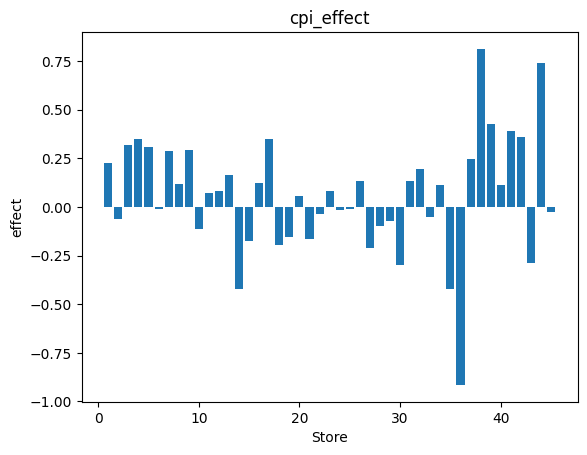

In [18]:
plt.bar(cpi_effect["Store"],cpi_effect["effect"])
plt.xlabel("Store")
plt.ylabel("effect")
plt.title('cpi_effect')
plt.plot()

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

here we can say that all the stores are affected by the cpi in both ways . store like 36,35 are affected severely , as the cpi increases the sale decreases . On the other hand stores like 38,44 affected positively ,sales increased with cpi

c. Does temperature affect the weekly sales in any manner?

In [19]:
temp_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['Temperature'])).reset_index(name='effect')
.sort_values('effect'))

/tmp/ipython-input-3098659858.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_effect= (df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['Temperature'])).reset_index(name='effect')


In [20]:
print(temp_effect.head())
print(temp_effect.tail())

    Store    effect
9      10 -0.432569
11     12 -0.379416
2       3 -0.377524
27     28 -0.376506
29     30 -0.330816
    Store    effect
23     24  0.111833
26     27  0.121809
15     16  0.182948
25     26  0.211722
43     44  0.267822


[]

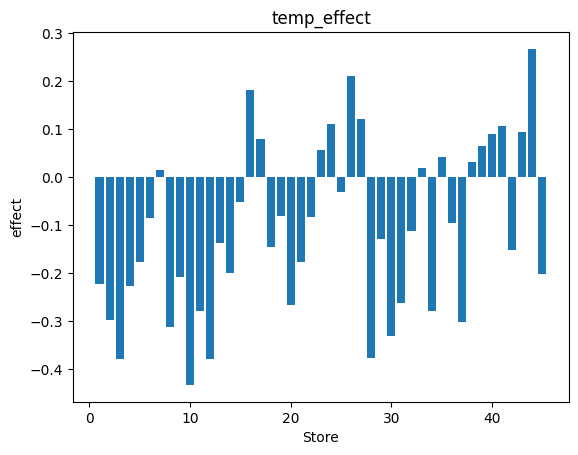

In [21]:
plt.bar(temp_effect["Store"],temp_effect["effect"])
plt.xlabel("Store")
plt.ylabel("effect")
plt.title('temp_effect')
plt.plot()

Here for majority of the stores the sales decreased with the increase of temperature.Some stores like 10 had the least affect on the change in temp where the store like 44 affected the most

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [22]:
top_performer=df.groupby('Store')['Weekly_Sales'].sum().reset_index(name='total_sales').sort_values('total_sales')

In [23]:
worst_performer_sales = top_performer.iloc[0]['total_sales']
best_performer_sales = top_performer.iloc[-1]['total_sales']

difference_in_performance = best_performer_sales - worst_performer_sales

print(f"Total sales of the worst performing store (Store {top_performer.iloc[0]['Store']}): {worst_performer_sales:.2f}")
print(f"Total sales of the best performing store (Store {top_performer.iloc[-1]['Store']}): {best_performer_sales:.2f}")
print(f"Difference in performance: {difference_in_performance:.2f}")

Total sales of the worst performing store (Store 33.0): 37160221.96
Total sales of the best performing store (Store 20.0): 301397792.46
Difference in performance: 264237570.50


In [24]:
difference_in_performance

np.float64(264237570.49999997)

In [25]:
top_performer.head(1)

,Store,total_sales
32,33,37160221.96


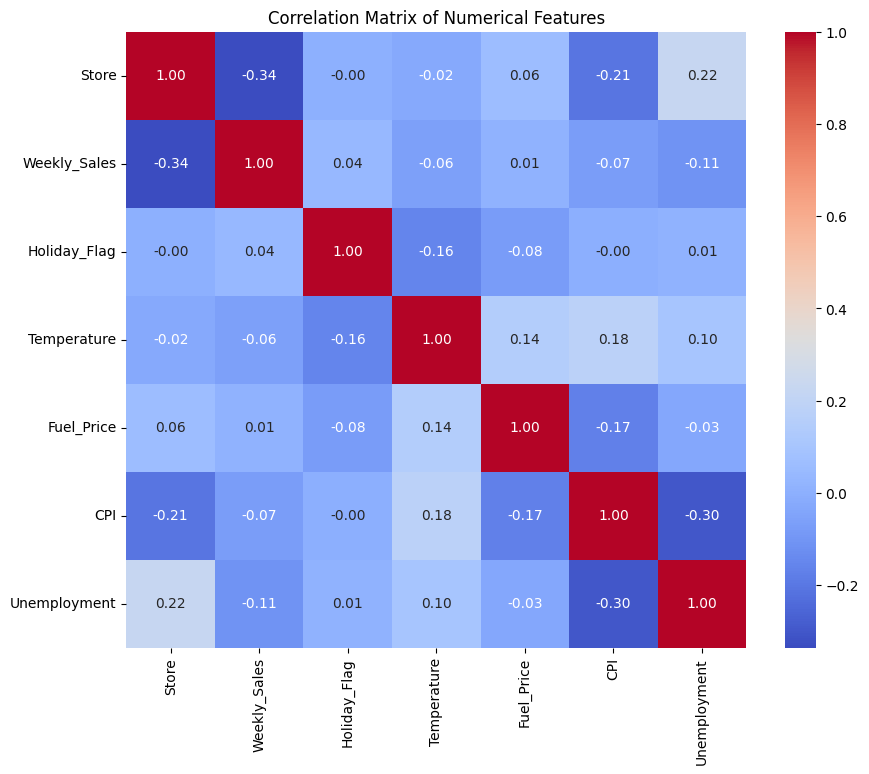

In [26]:
correlation_matrix = df.drop('Date', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
## just a correlatioon of the entire data


Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

In [29]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [30]:
df.set_index('Date',inplace=True)

In [31]:
store=df.copy()

In [32]:
store.drop(columns=['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)

In [33]:
store

,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68
...,...,...
2012-09-28,45,713173.95
2012-10-05,45,733455.07
2012-10-12,45,734464.36


In [34]:
store_1=store[store['Store']==1]

In [35]:
store_1.drop(columns='Store',inplace=True)


/tmp/ipython-input-1300500097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1.drop(columns='Store',inplace=True)


<Axes: xlabel='Date'>

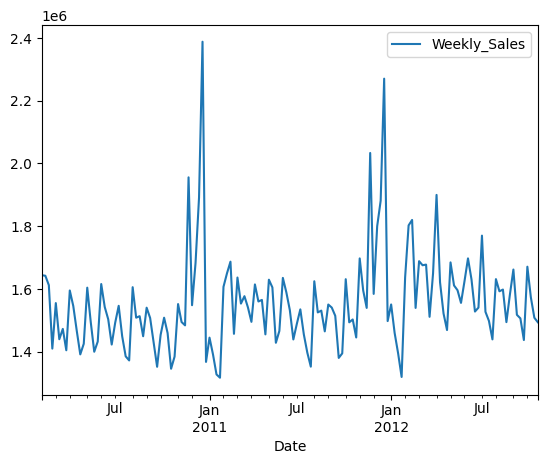

In [36]:
store_1.plot()

In [37]:
decompose=seasonal_decompose(store_1['Weekly_Sales'],model='additive',period=52)

[]

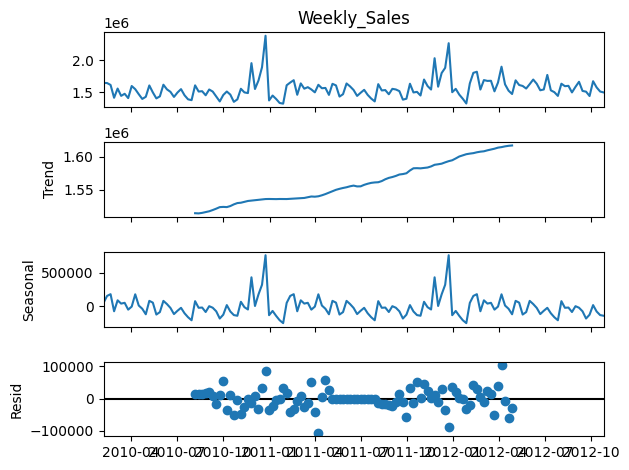

In [38]:
decompose.plot()
plt.plot()

In [39]:
result=adfuller(store_1['Weekly_Sales'])
p=result[1]

if p<0.05:
  print(f'the stores weekly_sales is stationary={p}')
else:
  print(f'make it stationary={p}')

the stores weekly_sales is stationary=1.3877788330759434e-05


In [40]:
size=int(len(store_1)*0.8)
train=store_1[:size]
test=store_1[size:]

In [41]:
p=range(0,7)
d=range(0,2)
q=range(0,5)

pdq= list(itertools.product(p,d,q))

order_x=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
  error=np.sqrt(mean_squared_error(test,pred))
  order_x.append(i)
  rmse.append(error)

best_pdq=pd.DataFrame(index=order_x,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [42]:
best_pdq.sort_values(by='rmse')

,rmse
"(4, 0, 0)",78250.142971
"(4, 0, 1)",79458.606082
"(2, 0, 2)",79574.797369
"(1, 0, 3)",80294.591318
"(4, 0, 3)",80468.948002
...,...
"(3, 1, 2)",249668.745117
"(2, 1, 0)",251657.396054
"(1, 1, 2)",256794.367807
"(1, 1, 0)",291336.894334


In [43]:
model=SARIMAX(train,order=(4,0,0),seasonal_order=(4,0,0,52))
model_fit=model.fit()
store_1['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-4005037773.py:3: SettingWithCo

In [44]:
mape_store_1= np.mean(np.abs((test['Weekly_Sales'] - store_1['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_1

np.float64(5.216982537557641)

In [45]:
test.index

DatetimeIndex(['2012-04-13', '2012-04-20', '2012-04-27', '2012-05-04',
               '2012-05-11', '2012-05-18', '2012-05-25', '2012-06-01',
               '2012-06-08', '2012-06-15', '2012-06-22', '2012-06-29',
               '2012-07-06', '2012-07-13', '2012-07-20', '2012-07-27',
               '2012-08-03', '2012-08-10', '2012-08-17', '2012-08-24',
               '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
               '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19',
               '2012-10-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

<Axes: xlabel='Date'>

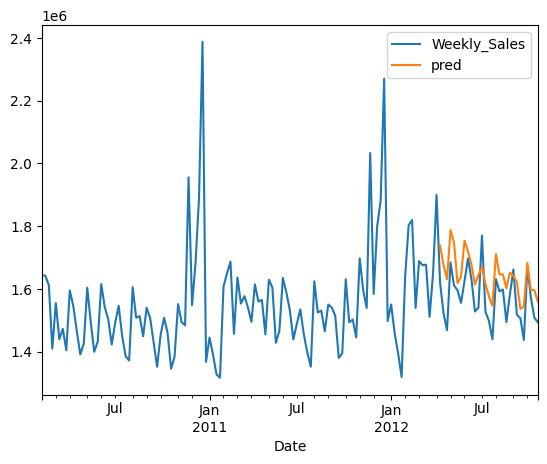

In [46]:
store_1[['Weekly_Sales','pred']].plot()

<Axes: xlabel='Date'>

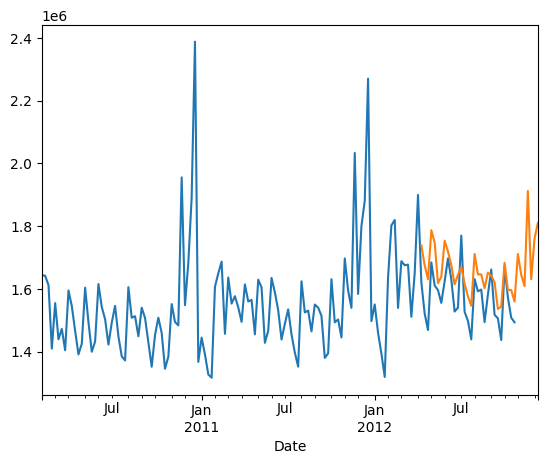

In [47]:
future=model_fit.forecast(steps=36)
store_1['Weekly_Sales'].plot()
future.plot()

In [48]:
future1=model_fit.get_forecast(steps=12)
future=future1.predicted_mean

In [49]:
future=future.reset_index()
future

,index,predicted_mean
0,2012-04-13,1.738500e+06
1,2012-04-20,1.675344e+06
2,2012-04-27,1.631068e+06
3,2012-05-04,1.787265e+06
4,2012-05-11,1.747971e+06
5,2012-05-18,1.617961e+06
6,2012-05-25,1.638936e+06
7,2012-06-01,1.753727e+06
8,2012-06-08,1.719390e+06
9,2012-06-15,1.676192e+06


In [50]:
store

,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68
...,...,...
2012-09-28,45,713173.95
2012-10-05,45,733455.07
2012-10-12,45,734464.36


In [51]:
store_2=store[store['Store']==2]

store_2.drop(columns='Store',inplace=True)
store_2

/tmp/ipython-input-579308806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_2.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13
...,...
2012-09-28,1746470.56
2012-10-05,1998321.04
2012-10-12,1900745.13


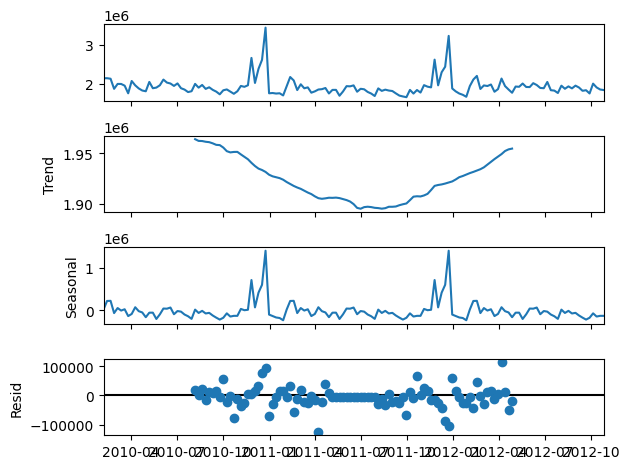

In [52]:
decompose=seasonal_decompose(store_2,model='additive',period=52)
decompose.plot()
plt.show()

In [53]:
result=adfuller(store_2)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =0.003990207089066268


In [54]:
size=int(len(store_2)*0.8)
train=store_2[:size]
test=store_2[size:]


p=range(0,7)
d=range(0,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [55]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(4, 1, 2)",78257.142269
"(2, 1, 1)",80119.598227
"(1, 1, 1)",80915.280459
"(6, 1, 2)",82381.438601
"(5, 1, 2)",82623.308561
"(2, 1, 2)",85615.312449
"(0, 0, 0)",85902.223713
"(0, 0, 1)",86535.022750
"(5, 1, 1)",87391.358808
"(4, 0, 2)",87644.486396


In [56]:
sarimax=SARIMAX(train,order=(4,1,2),seasonal_order=(4,1,2,52))
model_fit=sarimax.fit()
store_2['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

<Axes: xlabel='Date'>

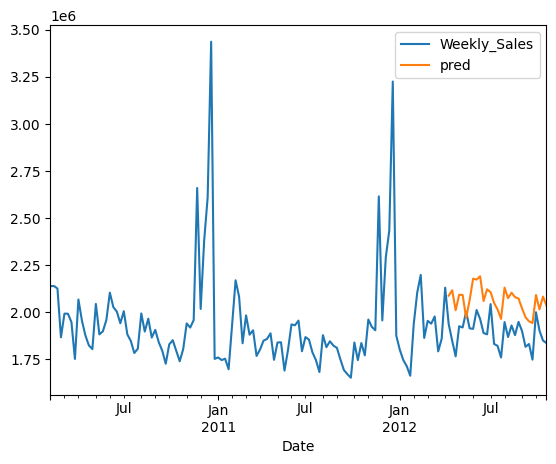

In [57]:
store_2[['Weekly_Sales','pred']].plot()

In [58]:
mape_store_2 = np.mean(np.abs((test['Weekly_Sales'] - store_2['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_2

np.float64(9.288981673226548)

<Axes: xlabel='Date'>

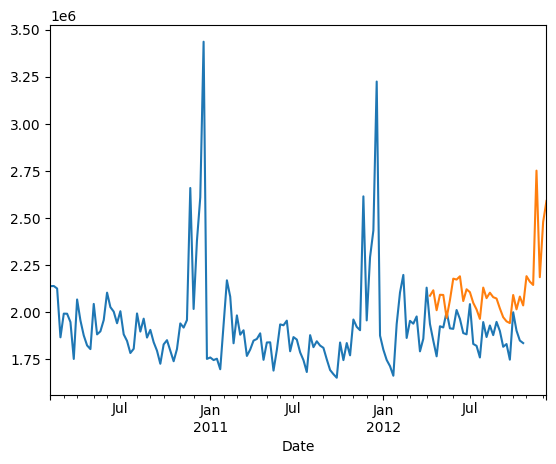

In [59]:
future=model_fit.forecast(steps=36)
store_2['Weekly_Sales'].plot()
future.plot()

In [60]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [61]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,2.086167e+06
1,2012-04-20,2.115029e+06
2,2012-04-27,2.009086e+06
3,2012-05-04,2.091151e+06
4,2012-05-11,2.090224e+06
5,2012-05-18,1.968420e+06
6,2012-05-25,2.062825e+06
7,2012-06-01,2.176922e+06
8,2012-06-08,2.172033e+06
9,2012-06-15,2.189436e+06


In [62]:
store_3=store[store['Store']==3]



In [63]:
store_3.drop(columns='Store',inplace=True)
store_3

/tmp/ipython-input-1177125527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_3.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,461622.22
2010-02-12,420728.96
2010-02-19,421642.19
2010-02-26,407204.86
2010-03-05,415202.04
...,...
2012-09-28,389813.02
2012-10-05,443557.65
2012-10-12,410804.39


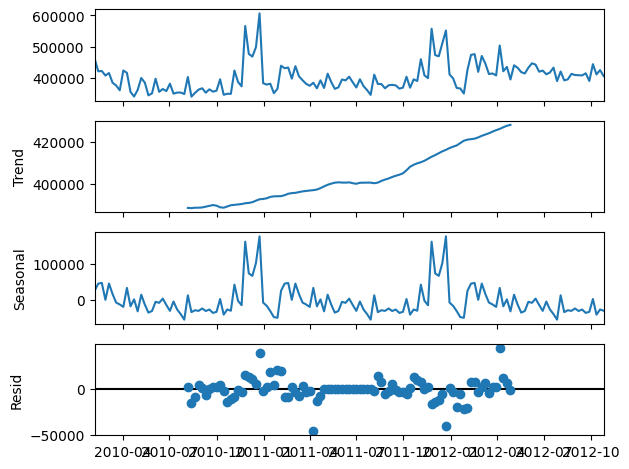

In [64]:
decompose=seasonal_decompose(store_3,model='additive',period=52)
decompose.plot()
plt.show()

In [65]:
result=adfuller(store_3)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =0.03840926179831256


In [66]:
size=int(len(store_3)*0.8)
train=store_3[:size]
test=store_3[size:]


p=range(0,7)
d=range(0,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [67]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(4, 0, 1)",19106.982759
"(4, 0, 2)",19756.807216
"(4, 0, 0)",20008.214342
"(6, 0, 1)",20328.660180
"(3, 0, 1)",20497.690757
"(1, 0, 2)",20559.146840
"(2, 0, 2)",20606.623928
"(3, 0, 0)",20652.538040
"(2, 0, 1)",20657.858411
"(1, 0, 1)",20772.155978


In [68]:
sarimax=SARIMAX(train,order=(4,0,1),seasonal_order=(4,0,1,52))
model_fit=sarimax.fit()
store_3['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-1195409684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

<Axes: xlabel='Date'>

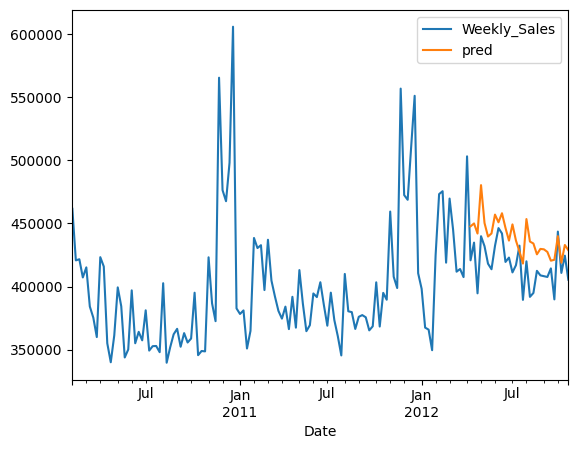

In [69]:
store_3[['Weekly_Sales','pred']].plot()

In [70]:
mape_store_3 = np.mean(np.abs((test['Weekly_Sales'] - store_3['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_3

np.float64(5.425551567174664)

<Axes: xlabel='Date'>

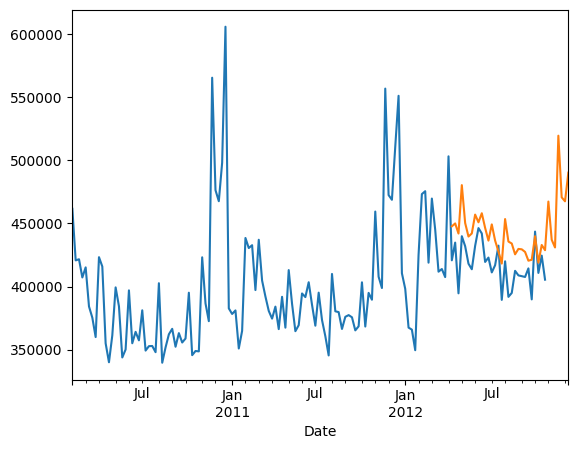

In [71]:
future=model_fit.forecast(steps=36)
store_3['Weekly_Sales'].plot()
future.plot()

In [72]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [73]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,447726.282956
1,2012-04-20,450027.558048
2,2012-04-27,442015.379868
3,2012-05-04,480402.324338
4,2012-05-11,450361.894331
5,2012-05-18,439655.153044
6,2012-05-25,442078.745910
7,2012-06-01,457031.739845
8,2012-06-08,450938.492671
9,2012-06-15,458115.434446


In [74]:
store_4=store[store['Store']==4]

In [75]:
store_4.drop(columns='Store',inplace=True)
store_4

/tmp/ipython-input-3628789280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_4.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


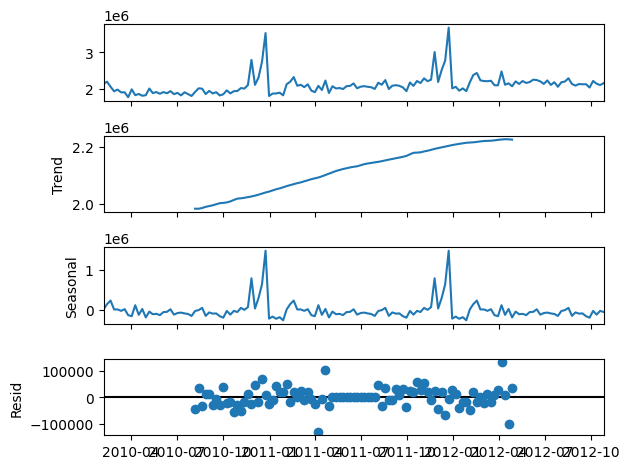

In [76]:
decompose=seasonal_decompose(store_4,model='additive',period=52)
decompose.plot()
plt.show()

In [77]:
result=adfuller(store_4)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =0.04779866223669836


In [78]:
size=int(len(store_4)*0.8)
train=store_4[:size]
test=store_4[size:]


p=range(0,7)
d=range(0,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [79]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(3, 0, 2)",73490.794161
"(3, 0, 1)",74776.696588
"(2, 0, 1)",78215.537190
"(6, 0, 1)",78431.995391
"(4, 0, 0)",81751.540701
"(1, 0, 2)",83593.196091
"(4, 0, 1)",85235.817512
"(1, 0, 1)",87652.937739
"(5, 0, 2)",90852.942888
"(2, 0, 2)",90874.022846


In [80]:
sarimax=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,52))
model_fit=sarimax.fit()
store_4['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

<Axes: xlabel='Date'>

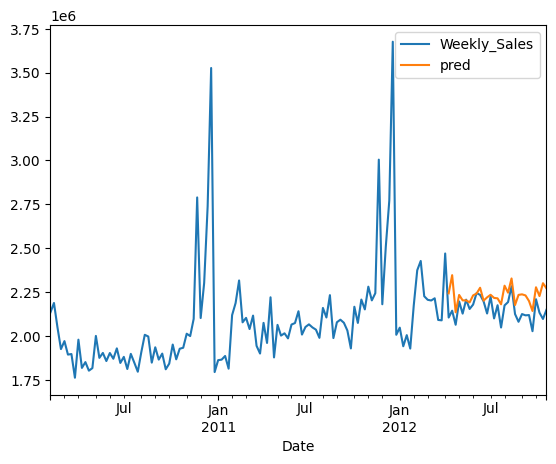

In [81]:
store_4[['Weekly_Sales','pred']].plot()

In [82]:
mape_store_4 = np.mean(np.abs((test['Weekly_Sales'] - store_4['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_4

np.float64(3.8635698398082474)

<Axes: xlabel='Date'>

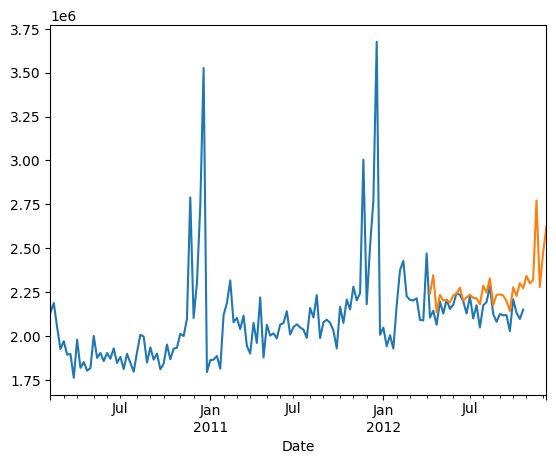

In [83]:
future=model_fit.forecast(steps=36)
store_4['Weekly_Sales'].plot()
future.plot()

In [84]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [85]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,2.243176e+06
1,2012-04-20,2.346681e+06
2,2012-04-27,2.135183e+06
3,2012-05-04,2.234001e+06
4,2012-05-11,2.203061e+06
5,2012-05-18,2.203247e+06
6,2012-05-25,2.191763e+06
7,2012-06-01,2.231419e+06
8,2012-06-08,2.242224e+06
9,2012-06-15,2.275030e+06


In [86]:
store_5=store[store['Store']==5]

In [87]:
store_5.drop(columns='Store',inplace=True)
store_5

/tmp/ipython-input-3592932491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_5.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,317173.10
2010-02-12,311825.70
2010-02-19,303447.57
2010-02-26,270281.63
2010-03-05,288855.71
...,...
2012-09-28,310141.68
2012-10-05,343048.29
2012-10-12,325345.41


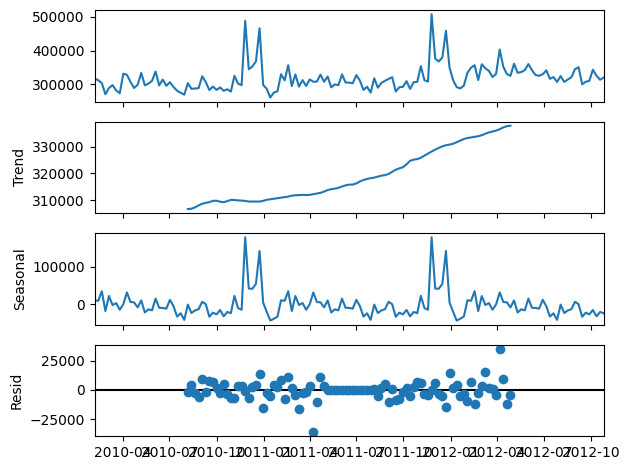

In [88]:
decompose=seasonal_decompose(store_5,model='additive',period=52)
decompose.plot()
plt.show()

In [89]:
result=adfuller(store_5)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =0.00042517056141923293


In [90]:
size=int(len(store_5)*0.8)
train=store_5[:size]
test=store_5[size:]


p=range(0,7)
d=range(0,2)
q=range(0,3)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [91]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(4, 0, 1)",15419.992368
"(4, 0, 0)",15433.626119
"(4, 0, 2)",16120.812973
"(3, 0, 1)",17197.755023
"(1, 0, 1)",17345.632838
"(2, 0, 1)",17421.168315
"(2, 0, 2)",17473.564218
"(1, 0, 2)",17474.195260
"(3, 0, 0)",17784.047123
"(2, 0, 0)",18547.668598


In [92]:
sarimax=SARIMAX(train,order=(4,0,1),seasonal_order=(4,0,1,52))
model_fit=sarimax.fit()
store_5['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-1795314361.py:3: SettingWithCo

<Axes: xlabel='Date'>

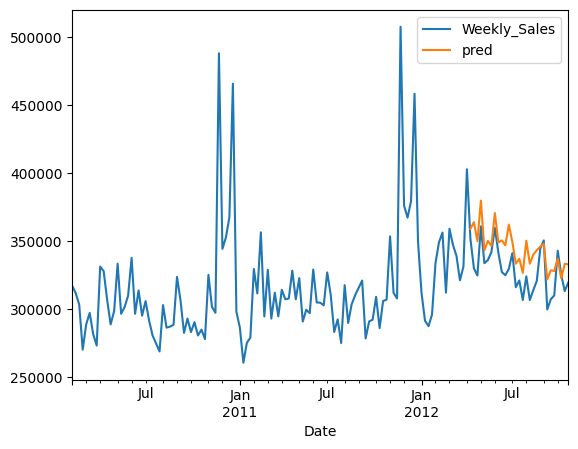

In [93]:
store_5[['Weekly_Sales','pred']].plot()

In [94]:
mape_store_5 = np.mean(np.abs((test['Weekly_Sales'] - store_5['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_5

np.float64(5.128744334766925)

<Axes: xlabel='Date'>

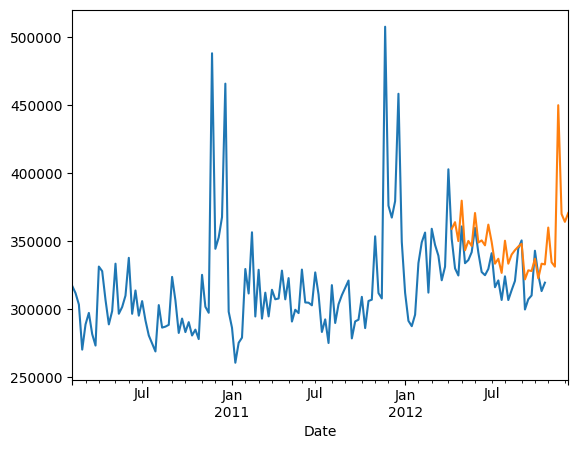

In [95]:
future=model_fit.forecast(steps=36)
store_5['Weekly_Sales'].plot()
future.plot()

In [96]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [97]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,359154.428792
1,2012-04-20,364060.835037
2,2012-04-27,350141.873095
3,2012-05-04,379883.750358
4,2012-05-11,343344.925826
5,2012-05-18,350272.312584
6,2012-05-25,346530.768998
7,2012-06-01,370813.733802
8,2012-06-08,349100.755140
9,2012-06-15,350652.244698


In [112]:
store_6=store[store['Store']==6]

In [113]:
store_6.drop(columns='Store',inplace=True)
store_6

/tmp/ipython-input-3391587923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_6.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,1652635.10
2010-02-12,1606283.86
2010-02-19,1567138.07
2010-02-26,1432953.21
2010-03-05,1601348.82
...,...
2012-09-28,1369131.46
2012-10-05,1518177.71
2012-10-12,1459396.84


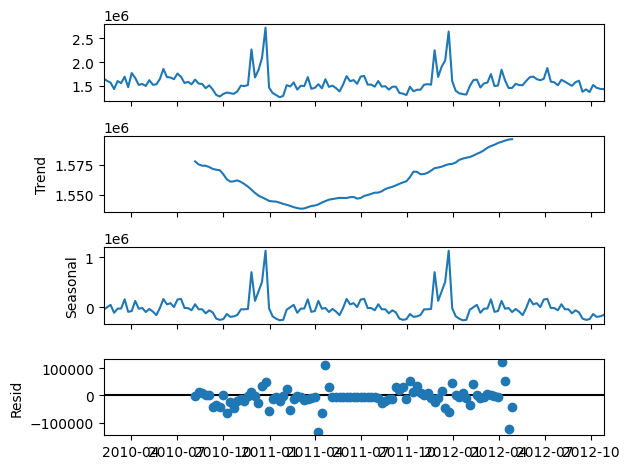

In [114]:
decompose=seasonal_decompose(store_6,model='additive',period=52)
decompose.plot()
plt.show()

In [115]:
result=adfuller(store_6)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =2.1594858682169703e-06


In [116]:
size=int(len(store_6)*0.8)
train=store_6[:size]
test=store_6[size:]

p=range(0,6)
d=range(0,2)
q=range(0,5)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [117]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(0, 0, 1)",107416.113210
"(0, 0, 0)",107491.223290
"(5, 1, 4)",109911.028927
"(2, 0, 2)",110791.646722
"(1, 0, 0)",111412.392755
"(0, 0, 2)",111449.907880
"(0, 1, 3)",112131.532608
"(1, 0, 1)",112274.094178
"(1, 0, 3)",112359.925820
"(2, 0, 0)",112427.815311


During the ARIMA grid search, the combination (0, 0, 1) yielded the lowest RMSE numerically. However, when I plotted its forecast against the actual test data, the shape diverged significantly—it failed to capture the underlying structure of the series.
I then reviewed the top-ranked models and found that the fourth-best pdq, while slightly higher in RMSE, produced a much more stable and realistic forecast. It aligned better with the actual trend and variability of the store’s time series.
This decision reflects a balance between statistical fit and business relevance. RMSE alone doesn’t penalize shape mismatch or instability, so I prioritized a model that generalizes better and offers more trustworthy predictions


In [118]:
sarimax=SARIMAX(train,order=(2,0,2),seasonal_order=(2,0,2,52))
model_fit=sarimax.fit()
store_6['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

<Axes: xlabel='Date'>

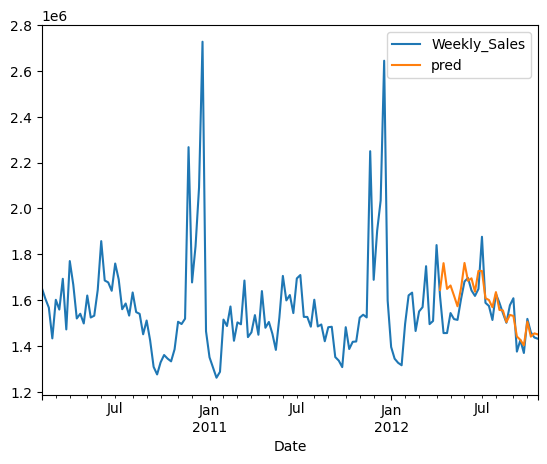

In [119]:
store_6[['Weekly_Sales','pred']].plot()

In [120]:
mape_store_6= np.mean(np.abs((test['Weekly_Sales'] - store_6['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_6

np.float64(3.76989053415751)

<Axes: xlabel='Date'>

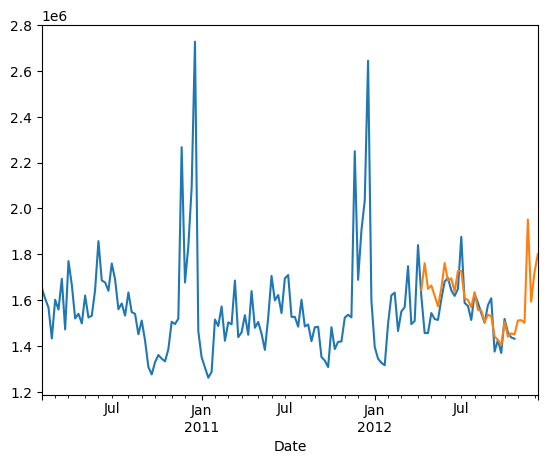

In [121]:
future=model_fit.forecast(steps=36)
store_6['Weekly_Sales'].plot()
future.plot()

In [122]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [123]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,1.644050e+06
1,2012-04-20,1.761245e+06
2,2012-04-27,1.648908e+06
3,2012-05-04,1.663756e+06
4,2012-05-11,1.619370e+06
5,2012-05-18,1.573052e+06
6,2012-05-25,1.650916e+06
7,2012-06-01,1.761996e+06
8,2012-06-08,1.684336e+06
9,2012-06-15,1.694989e+06


In [143]:
store_7=store[store['Store']==7]

In [144]:
store_7.drop(columns='Store',inplace=True)
store_7

/tmp/ipython-input-396925399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_7.drop(columns='Store',inplace=True)


,Weekly_Sales
Date,
2010-02-05,496725.44
2010-02-12,524104.92
2010-02-19,506760.54
2010-02-26,496083.24
2010-03-05,491419.55
...,...
2012-09-28,525545.76
2012-10-05,505830.56
2012-10-12,503463.93


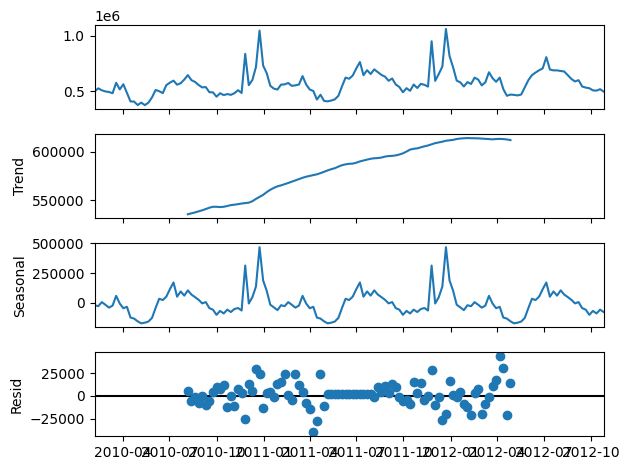

In [128]:
decompose=seasonal_decompose(store_7,model='additive',period=52)
decompose.plot()
plt.show()

In [129]:
result=adfuller(store_7)
p=result[1]

if p<0.05:
  print(f'the store is stationary p ={p}')
else :
  print(f'make it stationary p={p}')

the store is stationary p =0.0002170071890711771


In [130]:
size=int(len(store_7)*0.8)
train=store_7[:size]
test=store_7[size:]

p=range(0,6)
d=range(0,2)
q=range(0,5)

pdq=list(itertools.product(p,d,q))

order1=[]
rmse=[]


for i in pdq:
  model=ARIMA(train,order=i)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

  error=np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order1.append(i)


rmse_score=pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

In [131]:
rmse_score.sort_values(by='rmse',ascending=True)

,rmse
"(0, 0, 0)",94934.741735
"(0, 0, 1)",95379.689852
"(0, 0, 2)",97210.699537
"(0, 0, 3)",97286.149080
"(2, 1, 0)",97523.163264
"(0, 1, 1)",97563.990257
"(1, 1, 0)",97654.896706
"(1, 1, 1)",97722.071603
"(0, 1, 2)",97769.826764
"(1, 0, 0)",97809.080277


In [145]:
sarimax=SARIMAX(train,order=(4,0,4),seasonal_order=(4,0,4,52),)
model_fit=sarimax.fit()
store_7['pred']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-1875009684.py:3: SettingWithCopyWarning: 
A value is try

<Axes: xlabel='Date'>

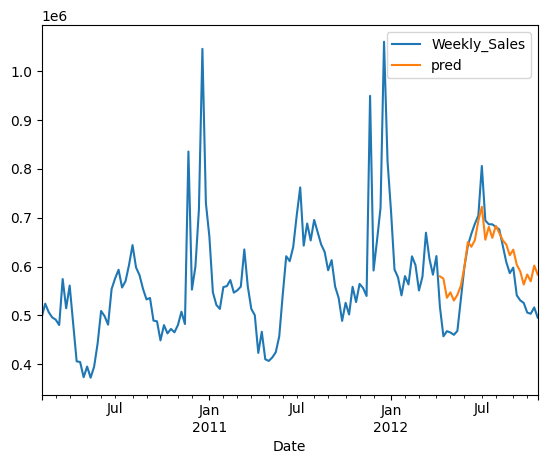

In [146]:
store_7[['Weekly_Sales','pred']].plot()

In [147]:
mape_store_7= np.mean(np.abs((test['Weekly_Sales'] - store_7['pred'][test.index]) / test['Weekly_Sales'])) * 100
mape_store_7

np.float64(8.723421156161136)

<Axes: xlabel='Date'>

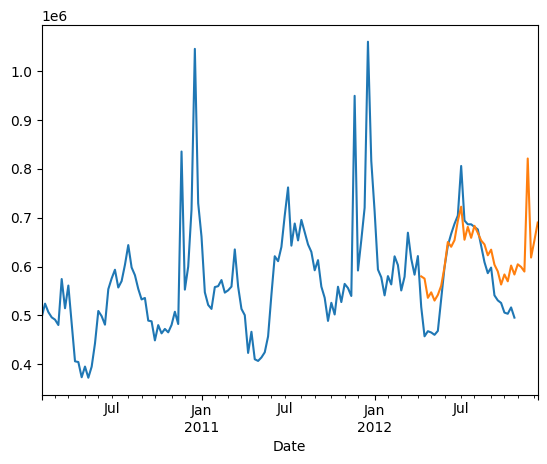

In [148]:
future=model_fit.forecast(steps=36)
store_6['Weekly_Sales'].plot()
future.plot()

In [149]:
forecast=model_fit.get_forecast(steps=12)
forecast1=forecast.predicted_mean

In [150]:
forecast1=forecast1.reset_index()
forecast1

,index,predicted_mean
0,2012-04-13,579904.010471
1,2012-04-20,575385.082008
2,2012-04-27,536087.678230
3,2012-05-04,547277.284535
4,2012-05-11,530441.890983
5,2012-05-18,542026.285387
6,2012-05-25,560656.209573
7,2012-06-01,598922.248367
8,2012-06-08,650132.006177
9,2012-06-15,640432.023876


In [151]:
print( f'store  1 mape ={mape_store_1}')
print(f'store  2 mape ={mape_store_2}')
print(f'store  3 mape ={mape_store_3}')
print(f'store  4 mape ={mape_store_4}')
print(f'store  5 mape ={mape_store_5}')
print(f'store  6 mape ={mape_store_6}')
print(f'store 7 mape={mape_store_7}')

store  1 mape =5.216982537557641
store  2 mape =9.288981673226548
store  3 mape =5.425551567174664
store  4 mape =3.8635698398082474
store  5 mape =5.128744334766925
store  6 mape =3.76989053415751
store 7 mape=8.723421156161136
